In [243]:
import pandas as pd
import matplotlib.pyplot as plt
plt.matplotlib.style.use("seaborn")

# Read data from NetLogo

In [244]:
dfl = pd.read_csv('../netlogo/log.csv',names=["id","start","end","vmax","num-cars","num-peds","num-cross","in","out","time"])
dfl.shape

(2962, 10)

In [245]:
#164253 ticks /120 fps ~ 22.8 min
data = dfl.drop(['start','end','vmax','in','out'],axis=1) 
data['time']= data['time']/120
# data['vmax'] = data['vmax'].mean() * 0.5 * 120
data.to_csv('./netlogo_output.csv')
data.head()

,id,num-cars,num-peds,num-cross,time
0,15,0,49,1,20.666667
1,45,0,49,1,23.308333
2,47,0,49,1,24.658333
3,34,0,49,1,26.766667
4,6,0,49,1,26.891667


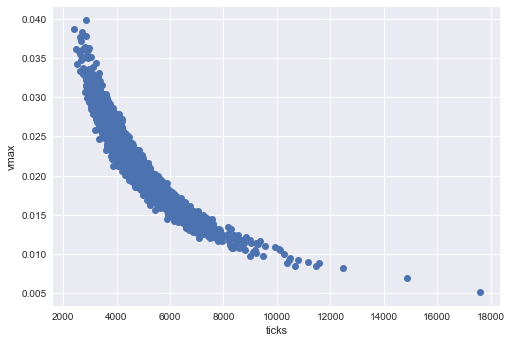

In [246]:
plt.plot(dfl["time"],dfl["vmax"],'o')
plt.xlabel("ticks")
plt.ylabel("vmax");

Text(0.5, 0, 'time')

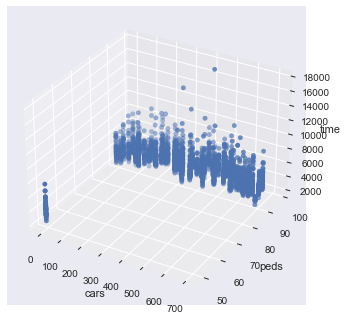

In [247]:
ax = plt.axes(projection='3d')
import numpy as np
x = dfl["num-cars"]
y = dfl["num-peds"]
z = dfl["time"]
ax.scatter(x,y,z)
ax.set_xlabel("cars")
ax.set_ylabel("peds")
ax.set_zlabel("time")

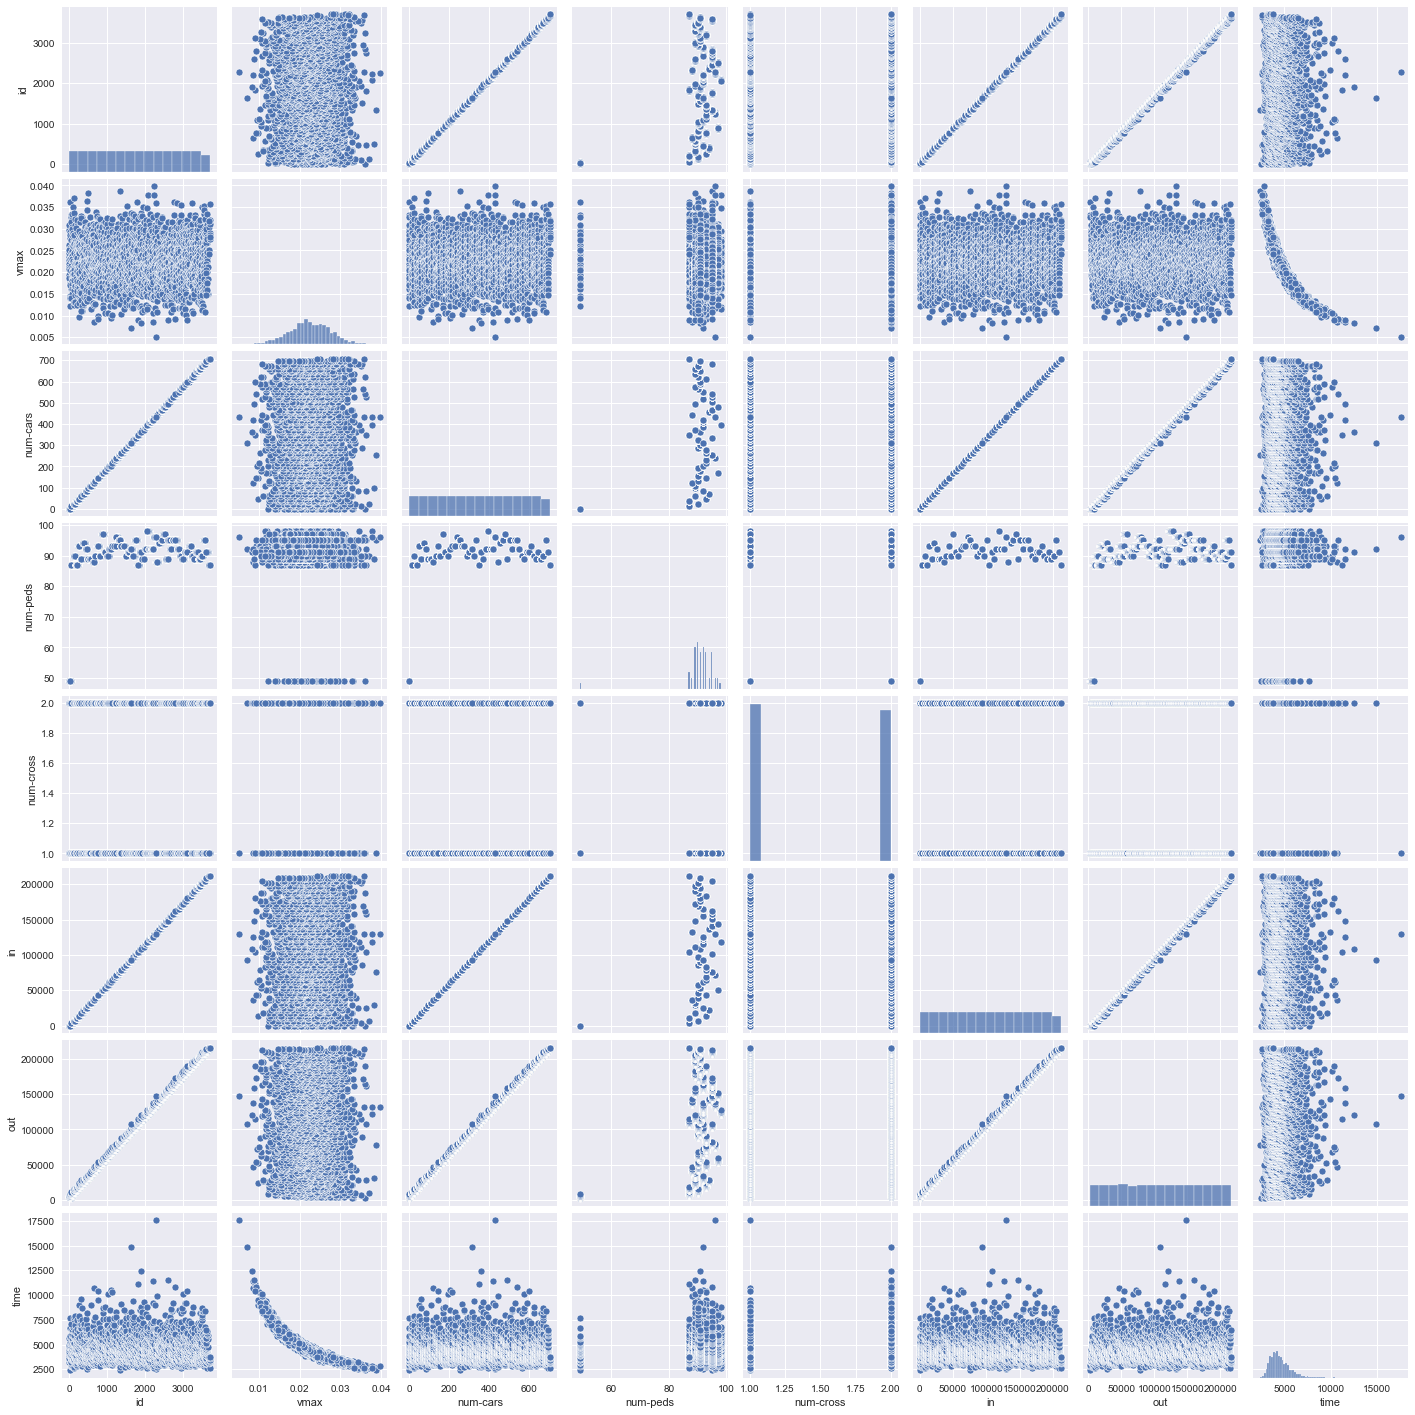

In [248]:
import seaborn as sns
sns.pairplot(dfl)

# Multiple Linear Regression

Based on [Web](https://www.analyticsvidhya.com/blog/2021/05/multiple-linear-regression-using-python-and-scikit-learn/)

In [249]:
#separate attributes from predicting attribute
x = dfl.drop(['id','start','end','vmax','in','out','time'],axis=1) 
#separate the predicting attribute into Y for model training
y = dfl['time']

In [250]:
#import train_test_split from sklearn
from sklearn.model_selection import train_test_split
#split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [251]:
#import module
from sklearn.linear_model import LinearRegression
#create an objeect of LinearRegression class
LR = LinearRegression()
#fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [252]:
y_prediction = LR.predict(x_test)

In [253]:
#import r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#predicting the accuracy score
score=r2_score(y_test,y_prediction)
meansqerr = mean_squared_error(y_test,y_prediction)
print(f'r2_score is: {score}')
print(f'mean sqrd error is:{meansqerr}')
print(f'root mean sqr err is:{np.sqrt(meansqerr)}')

r2_score is: 0.05227113209609646
mean sqrd error is:1839169.9368544018
root mean sqr err is:1356.1599967756024


# Random Forest

In [254]:
#separate attributes from predicting attribute
x = dfl.drop(['id','start','end','vmax','in','out','time'],axis=1) 
#separate the predicting attribute into Y for model training
y = dfl['time']

In [255]:
#import train_test_split from sklearn
from sklearn.model_selection import train_test_split
#split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [256]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()

#train the model
clf.fit(x_train,y_train)
#predict the model
y_prediction = clf.predict(x_test)

In [257]:
#import r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#predicting the accuracy score
score=r2_score(y_test,y_prediction)
meansqerr = mean_squared_error(y_test,y_prediction)
print(f'r2_score is: {score}')
print(f'mean sqrd error is:{meansqerr}')
print(f'root mean sqr err is:{np.sqrt(meansqerr)}')

r2_score is: 0.030734936678926017
mean sqrd error is:1880963.2434707596
root mean sqr err is:1371.4821338503684


# Gaussian Process Regression (not working)

In [258]:
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
# from sklearn import preprocessing

# #create a GP model
# kernel = C(1.0,(1e-3,1e3))*RBF(1,(1e-2,1e2))
# gp = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=100,)

# #scale the data
# scaler = preprocessing.StandardScaler().fit(x_train)
# x_train_scaled = scaler.transform(x_train)

# #fit the data
# gp.fit(x_train_scaled,y_train)

# #predict
# y_pred, sigma = gp.predict(x_test, return_std=True)

# Krigging with SMT library

In [259]:
#separate attributes from predicting attribute
x = dfl.drop(['id','start','end','vmax','in','out','time'],axis=1) 
#separate the predicting attribute into Y for model training
y = dfl['time']

In [260]:
#import train_test_split from sklearn
from sklearn.model_selection import train_test_split
#split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 2369
   
___________________________________________________________________________
   
 Training
   
   Training ...
exception :  768-th leading minor of the array is not positive definite
exception :  755-th leading minor of the array is not positive definite
exception :  759-th leading minor of the array is not positive definite
exception :  746-th leading minor of the array is not positive definite
exception :  702-th leading minor of the array is not positive definite
exception :  793-th leading minor of the array is not positive definite
exception :  748-th leading minor of the array is not positive definite
exception :  724-th leading minor of the array is not positive definite
exception :  731-th leading minor of the array is n

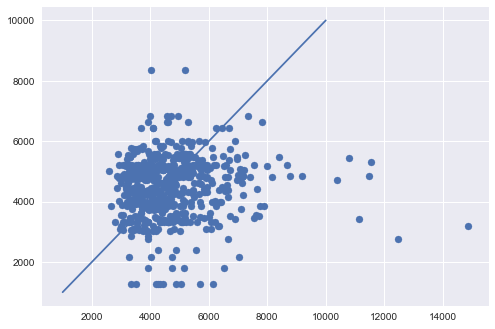

In [261]:
import numpy as np
import matplotlib.pyplot as plt
from smt.surrogate_models import KRG

sm = KRG(theta0=[1e-2])
sm.set_training_values(x_train.to_numpy(),y_train.to_numpy())
sm.train()

y_prediction = sm.predict_values(x_test.to_numpy())

fig, axs = plt.subplots(1)
axs.scatter(y_test.to_numpy(), y_prediction)
axs.plot([1000,10000],[1000,10000])

In [262]:
#import r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#predicting the accuracy score
score=r2_score(y_test,y_prediction)
meansqerr = mean_squared_error(y_test,y_prediction)
print(f'r2_score is: {score}')
print(f'mean sqrd error is:{meansqerr}')
print(f'root mean sqr err is:{np.sqrt(meansqerr)}')

r2_score is: -0.4809209487679871
mean sqrd error is:2873886.5935949837
root mean sqr err is:1695.2541383506439


# Data from paper

In [263]:
df = pd.read_csv('./data.csv')
df.head()

,id,x_obs,y_obs,x_est,y_est
0,1,2.57,38.10,2.57,38.10
1,1,2.78,37.39,2.78,37.39
2,1,2.95,36.69,2.95,36.69
3,1,3.11,35.97,3.11,35.97
4,1,3.27,35.22,3.27,35.22


In [264]:
def plot_data(num=1):
    fig, ax = plt.subplots(figsize=(2,10))
    for num in range(5):
        x = df[df['id']==num].x_obs
        y = df[df['id']==num].y_obs
        xe = df[df['id']==num].x_est
        ye = df[df['id']==num].y_est
        ax.plot(x,y,label=f'obs{num}')
        ax.plot(xe,ye,label=f'est{num}')
    plt.legend(loc='lower left',bbox_to_anchor=(1.04, 0),fancybox=True,shadow=True)

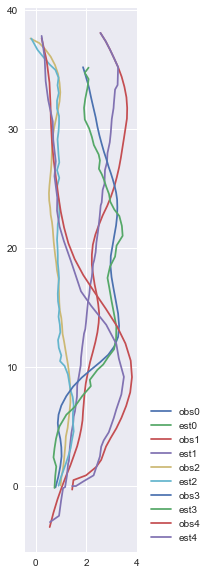

In [265]:
plot_data(5)